#  Прогнозирование заказов такси

**Цель исследования.**
    Cпрогнозировать количество заказов такси на следующий час.
    
**Описание исследования.**
  Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Заказчик хочет привлекать больше водителей в период пиковой нагрузки.
  
**Задачи исследования.**

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами.
4. Сделать тестовую выборку размером 10% от исходных данных.
5. Проверить данные на тестовой выборке и сделать выводы.
6. Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

**Исходные данные.**

Данные лежат в файле `taxi.csv`. 

В столбце `num_orders` находится количество заказов.
В столбце `datetime` находится дата и время.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ресемплирование</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Декомпозиция" data-toc-modified-id="Декомпозиция-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Декомпозиция</a></span></li><li><span><a href="#Ресемплирование-по-дням-и-декомпозиция" data-toc-modified-id="Ресемплирование-по-дням-и-декомпозиция-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ресемплирование по дням и декомпозиция</a></span></li><li><span><a href="#Исследование-стационарности-ряда" data-toc-modified-id="Исследование-стационарности-ряда-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование стационарности ряда</a></span><ul class="toc-item"><li><span><a href="#Графики-сдвига" data-toc-modified-id="Графики-сдвига-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Графики сдвига</a></span></li><li><span><a href="#Тест-Дики-Фуллера" data-toc-modified-id="Тест-Дики-Фуллера-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Тест Дики-Фуллера</a></span></li><li><span><a href="#Критерий-KPSS" data-toc-modified-id="Критерий-KPSS-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Критерий KPSS</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создание-фичей" data-toc-modified-id="Создание-фичей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание фичей</a></span><ul class="toc-item"><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Матрица корреляций</a></span></li><li><span><a href="#Эксперимент-с-корреляцией" data-toc-modified-id="Эксперимент-с-корреляцией-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Эксперимент с корреляцией</a></span></li></ul></li><li><span><a href="#Деление-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Деление-на-обучающую-и-тестовую-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Деление на обучающую и тестовую выборки</a></span></li><li><span><a href="#Трансформеры" data-toc-modified-id="Трансформеры-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Трансформеры</a></span></li><li><span><a href="#Создание-таблицы-для-сбора-результатов-обучения" data-toc-modified-id="Создание-таблицы-для-сбора-результатов-обучения-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Создание таблицы для сбора результатов обучения</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>LGBMRegressor</a></span><ul class="toc-item"><li><span><a href="#Сам-обрабатывает-категориальные-признаки" data-toc-modified-id="Сам-обрабатывает-категориальные-признаки-3.5.4.1"><span class="toc-item-num">3.5.4.1&nbsp;&nbsp;</span>Сам обрабатывает категориальные признаки</a></span></li><li><span><a href="#Получает-полностью-кодированные-данные" data-toc-modified-id="Получает-полностью-кодированные-данные-3.5.4.2"><span class="toc-item-num">3.5.4.2&nbsp;&nbsp;</span>Получает полностью кодированные данные</a></span></li></ul></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.5.5"><span class="toc-item-num">3.5.5&nbsp;&nbsp;</span>CatBoostRegressor</a></span><ul class="toc-item"><li><span><a href="#Сам-обрабатывает-категориальные-признаки" data-toc-modified-id="Сам-обрабатывает-категориальные-признаки-3.5.5.1"><span class="toc-item-num">3.5.5.1&nbsp;&nbsp;</span>Сам обрабатывает категориальные признаки</a></span></li><li><span><a href="#Получает-полностью-кодированные-данные" data-toc-modified-id="Получает-полностью-кодированные-данные-3.5.5.2"><span class="toc-item-num">3.5.5.2&nbsp;&nbsp;</span>Получает полностью кодированные данные</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

In [1]:
import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

import lightgbm as lgb
from lightgbm import LGBMRegressor

import catboost
from catboost import CatBoostRegressor

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

RANDOM_STATE = 0

## Подготовка


In [2]:
df = pd.read_csv('/datasets/taxi.csv')

In [3]:
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


У нас есть два параметра - дата и количество заказов. Переведём дату в нужный формат явно.

In [5]:
df['datetime'] = df['datetime'].astype('datetime64') 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


Теперь сделаем из неё индекс датасета.

In [7]:
df = df.set_index('datetime')

In [8]:
df.index.is_monotonic

True

### Ресемплирование

Видим, что сет упорядоченный. Теперь ресемплируем его. Сейчас данные фиксированы каждые десять минут, сделаем промежуток побольше - час. Суммируем количество заказов.

In [9]:
df = df.resample('1H').sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


Количество строк заметно уменьшилось.

In [10]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


И теперь данные фиксированы за каждый час.

## Анализ

<AxesSubplot:xlabel='datetime'>

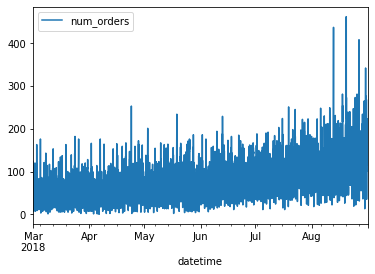

In [11]:
df.plot()

"Забор" из данных по крайней мере показывает, что среднее растёт - основная часть слева в пределах ста, а справа расширяется до двухсот. Также увеличивается разброс - слева почти от нуля до ста с небольшим, а справа от примерно тридцати до двухсот пятидесяти. Посмотрим на тренды и сезонность.

### Декомпозиция

In [12]:
decomposed = seasonal_decompose(df)

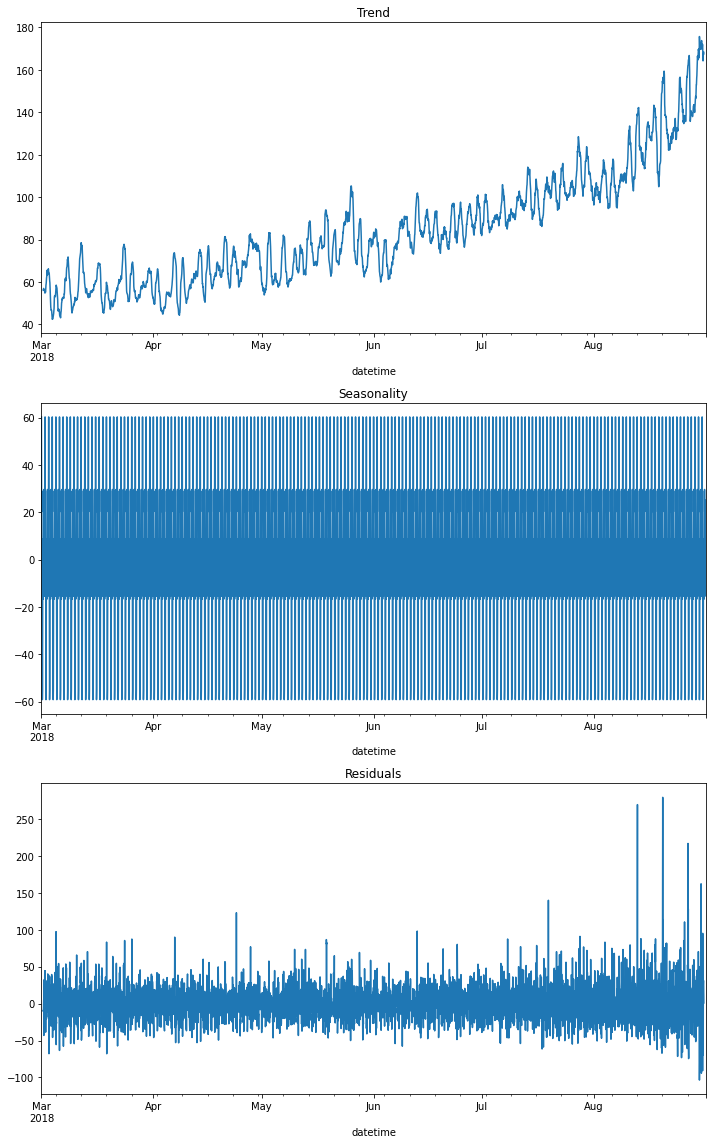

In [13]:
plt.figure(figsize=(10, 16))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Тренд нам показывает рост, а сезонность не видно, надо посмотреть поближе. Возьму несколько строк из начала датасета.

Text(0.5, 1.0, 'Seasonality')

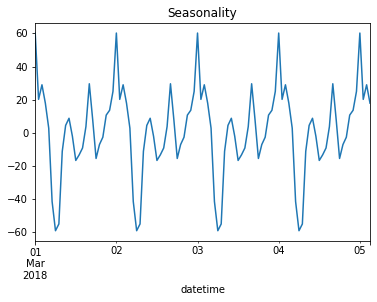

In [14]:
decomposed.seasonal.head(100).plot(ax=plt.gca())
plt.title('Seasonality')

Видим, что каждый день картина повторяется.

Text(0.5, 1.0, 'Seasonality')

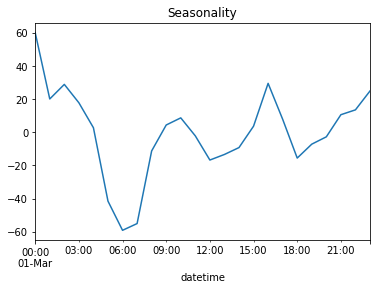

In [15]:
decomposed.seasonal.head(24).plot(ax=plt.gca())
plt.title('Seasonality')

Самая низкая нагрузка в 6 утра. Возрастание в 8-10 часов  - люди поехали на работу. Пик в 16 часов - вопрос, но он есть. Постепенное увеличение спроса с 18 часов - кто-то едет домой, кто-то на мероприятие, кто-то с мероприятия, а чем позднее, тем люди более уставшие, чувствуют себя в большей безопасности в такси, нежели на улице. Что за активность ночью - тоже при необходимости надо проводить исследования.

Если сэмплировать по дням, то получим следующее:

### Ресемплирование по дням и декомпозиция

In [16]:
df_day = df.resample('1D').sum()

In [17]:
decomposed = seasonal_decompose(df_day)

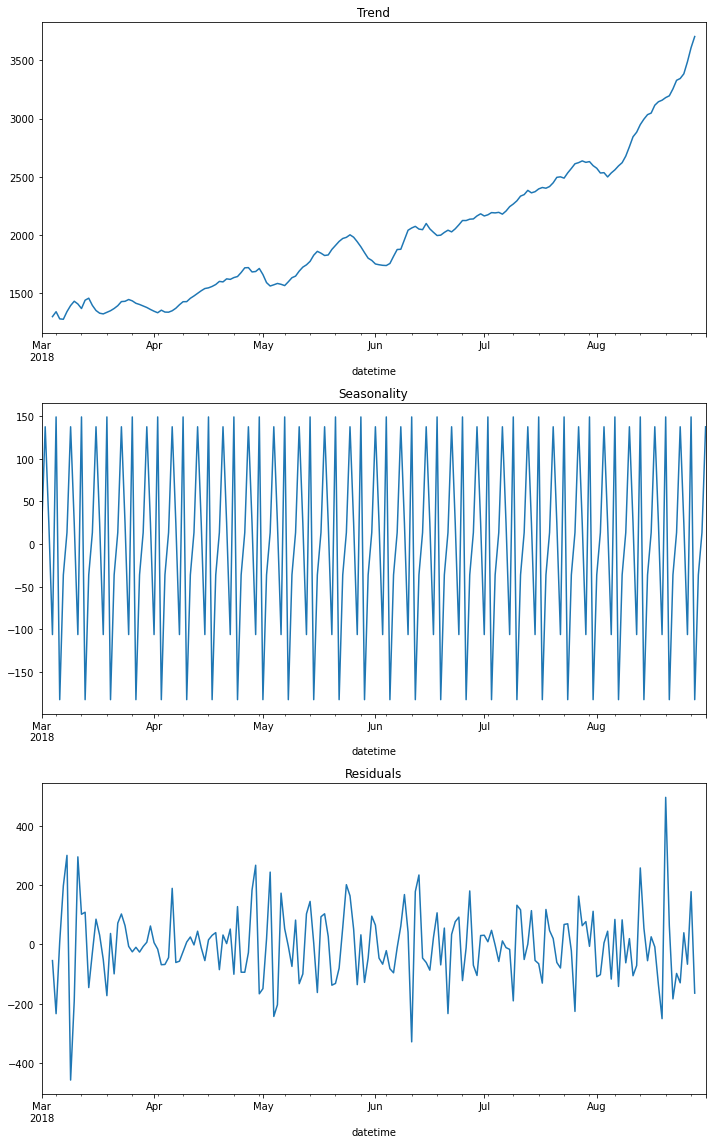

In [18]:
plt.figure(figsize=(10, 16))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Text(0.5, 1.0, 'Seasonality')

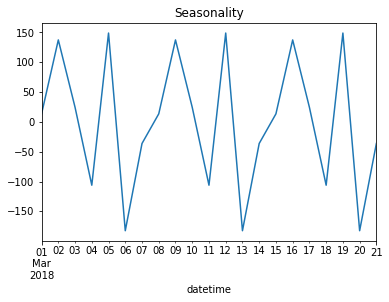

In [19]:
decomposed.seasonal.head(21).plot(ax=plt.gca())
plt.title('Seasonality')

1 марта 2018 года - четверг.
В пятницу и понедельник - самый высокий спрос, по вторникам - самый низкий. 

Тренд тот же, а сезонность показывает, как зависит количество заказов от дня недели. Действительно, в отличие от месяца и года этот параметр может стать хорошим признаком для моделирования.

### Исследование стационарности ряда

#### Графики сдвига

In [20]:
data = df - df.shift()

**Окно равно 24 часа.**

In [21]:
data['mean'] = data['num_orders'].rolling(24).mean()
data['std'] = data['num_orders'].rolling(24).std()

In [22]:
data.describe()

,num_orders,mean,std
count,4415.000000,4392.000000,4392.000000
mean,0.018347,0.025178,38.042933
std,39.023437,1.465385,11.698187
min,-269.000000,-13.708333,16.118223
25%,-22.000000,-0.750000,30.021821
50%,1.000000,0.041667,36.030771
75%,23.000000,0.833333,43.069185
max,193.000000,13.666667,93.636980


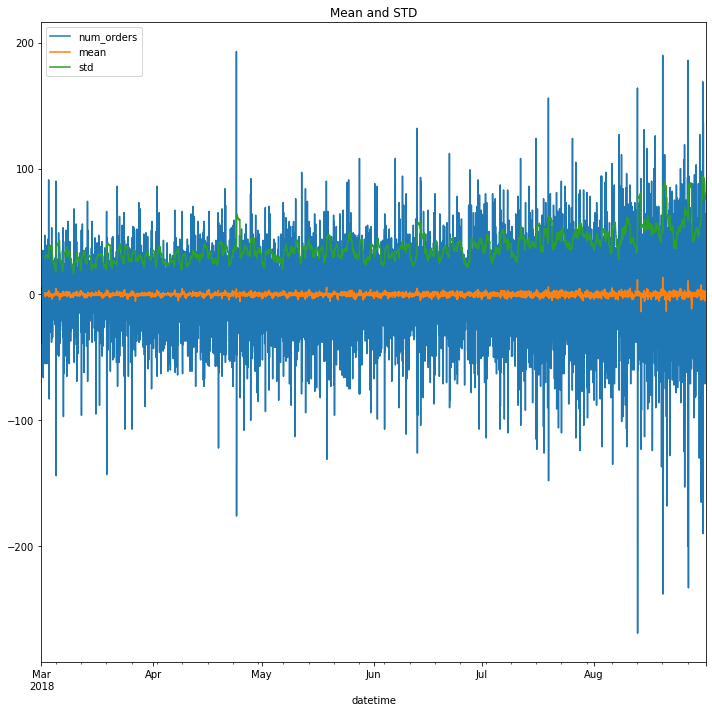

In [23]:
plt.figure(figsize=(10, 10))
data.plot(ax=plt.gca())
plt.title('Mean and STD')
plt.tight_layout()


Видим возрастающее отклонение и колеблющееся среднее.

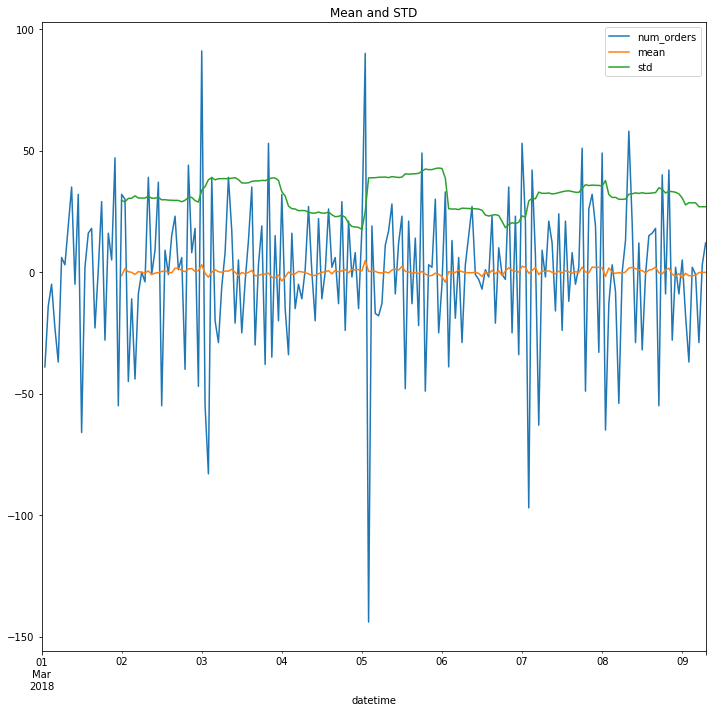

In [24]:
plt.figure(figsize=(10, 10))
data.head(200).plot(ax=plt.gca())
plt.title('Mean and STD')
plt.tight_layout()


**Окно равно неделе** (24*7=168)

In [25]:
data['mean'] = data['num_orders'].rolling(168).mean()
data['std'] = data['num_orders'].rolling(168).std()

In [26]:
data.describe()

,num_orders,mean,std
count,4415.000000,4248.000000,4248.000000
mean,0.018347,0.023563,37.628639
std,39.023437,0.162449,8.448794
min,-269.000000,-1.023810,25.684231
25%,-22.000000,-0.065476,31.208139
50%,1.000000,0.017857,35.408250
75%,23.000000,0.113095,42.581880
max,193.000000,1.982143,65.975860


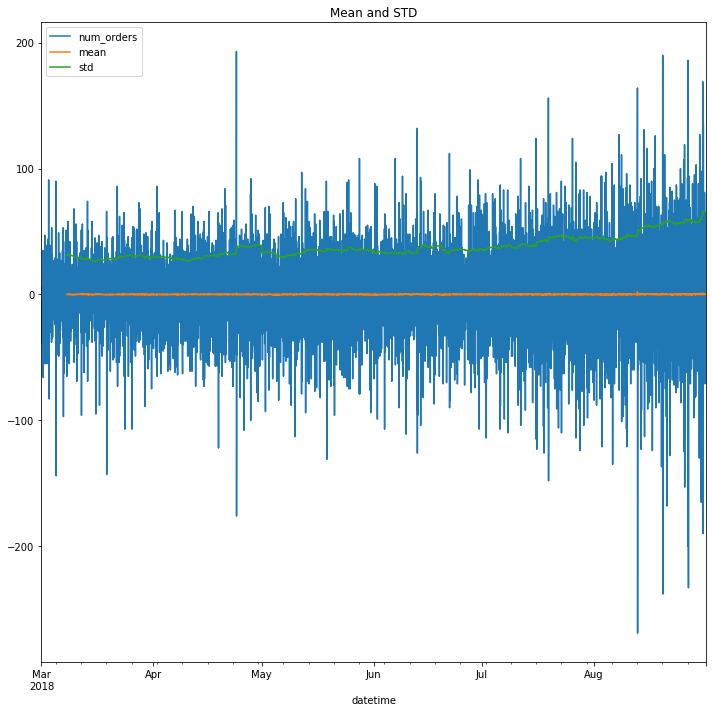

In [27]:
plt.figure(figsize=(10, 10))
data.plot(ax=plt.gca())
plt.title('Mean and STD')
plt.tight_layout()


Более "спокойное" среднее.

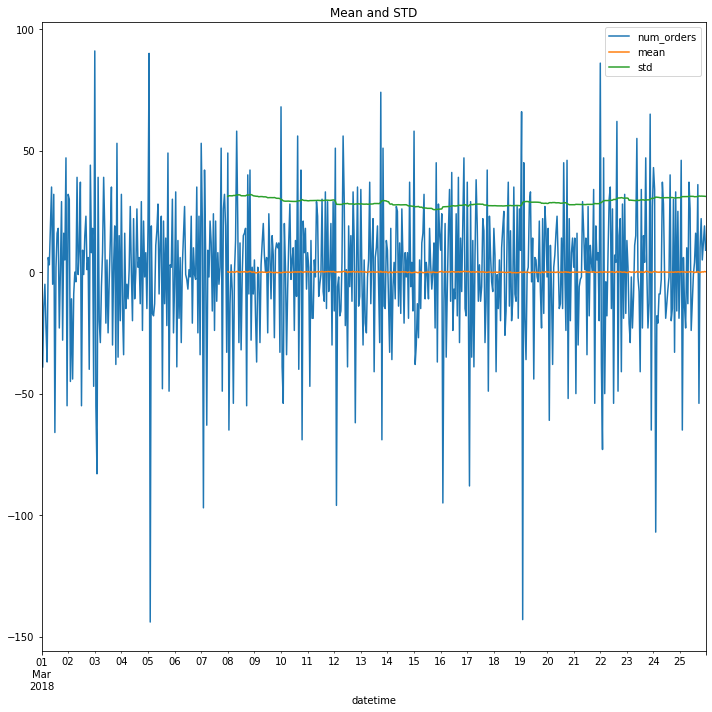

In [28]:
plt.figure(figsize=(10, 10))
data.head(600).plot(ax=plt.gca())
plt.title('Mean and STD')
plt.tight_layout()


Если возьмём суточное окно, то колебания среднего видны хорошо, а если взять неделю, то данные становятся более "ровными". Но при растущем отклонении их всё равно нельзя назвать стационарным.

#### Тест Дики-Фуллера

In [29]:
result = adfuller(df['num_orders'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
print("used lag:", result[2])

ADF Statistic: -3.0689242890279558
p-value: 0.028940051402612906
Critical Values: {'1%': -3.431842162413052, '5%': -2.8621993540813637, '10%': -2.567120978470452}
used lag: 30


#### Критерий KPSS

In [30]:
is_c = kpss(df['num_orders'], regression='c', nlags='auto', store=False)
is_ct = kpss(df['num_orders'], regression='ct', nlags='auto', store=False)
print('hypothesis: if df is stationary around a constant')
print('kpss_stat:',is_c[0])
print('p_value:',is_c[1])
print('Critical Values:',is_c[3])
print("used lag:", is_c[2])
print('\nhypothesis: if df is stationary around a trend')
print('kpss_stat:',is_ct[0])
print('p_value:',is_ct[1])
print('Critical Values:',is_ct[3])
print("used lag:", is_ct[2])

hypothesis: if df is stationary around a constant
kpss_stat: 10.913353384602186
p_value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
used lag: 32

hypothesis: if df is stationary around a trend
kpss_stat: 1.5541377850842126
p_value: 0.01
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
used lag: 7


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Обучение

Перед нами стоит задача регрессии - это обучение с учителем. На основе данных за предыдущие дни/часы модели надо предложить вариант события на час вперёд.

### Создание фичей

Функция формирования параметров датасета.

In [31]:
def make_features(data, col_name, max_lag, rolling_mean_size):
    #data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[col_name].shift(lag)
    data['rolling_mean'] = data[col_name].shift().rolling(rolling_mean_size).mean()


Теперь нам нужно подобрать такие параметры для функции, при которых модель будет ошибаться не сильнее заданного.
Возьмём окно 5 часов и сдвиг 24 часа, просто так. Первое марта не пропадёт, оно будет учтено посредством усреднения в сдвигах.

In [32]:
make_features(df, 'num_orders', 24, 5)


In [33]:
df.head(10)

,num_orders,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 05:00:00,6,1,3,43.0,66.0,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.8
2018-03-01 06:00:00,12,1,3,6.0,43.0,66.0,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.2
2018-03-01 07:00:00,15,1,3,12.0,6.0,43.0,66.0,71.0,85.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.6
2018-03-01 08:00:00,34,1,3,15.0,12.0,6.0,43.0,66.0,71.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.4


Удаляю пустые строки.

In [34]:
df = df.dropna()

#### Матрица корреляций

<AxesSubplot:>

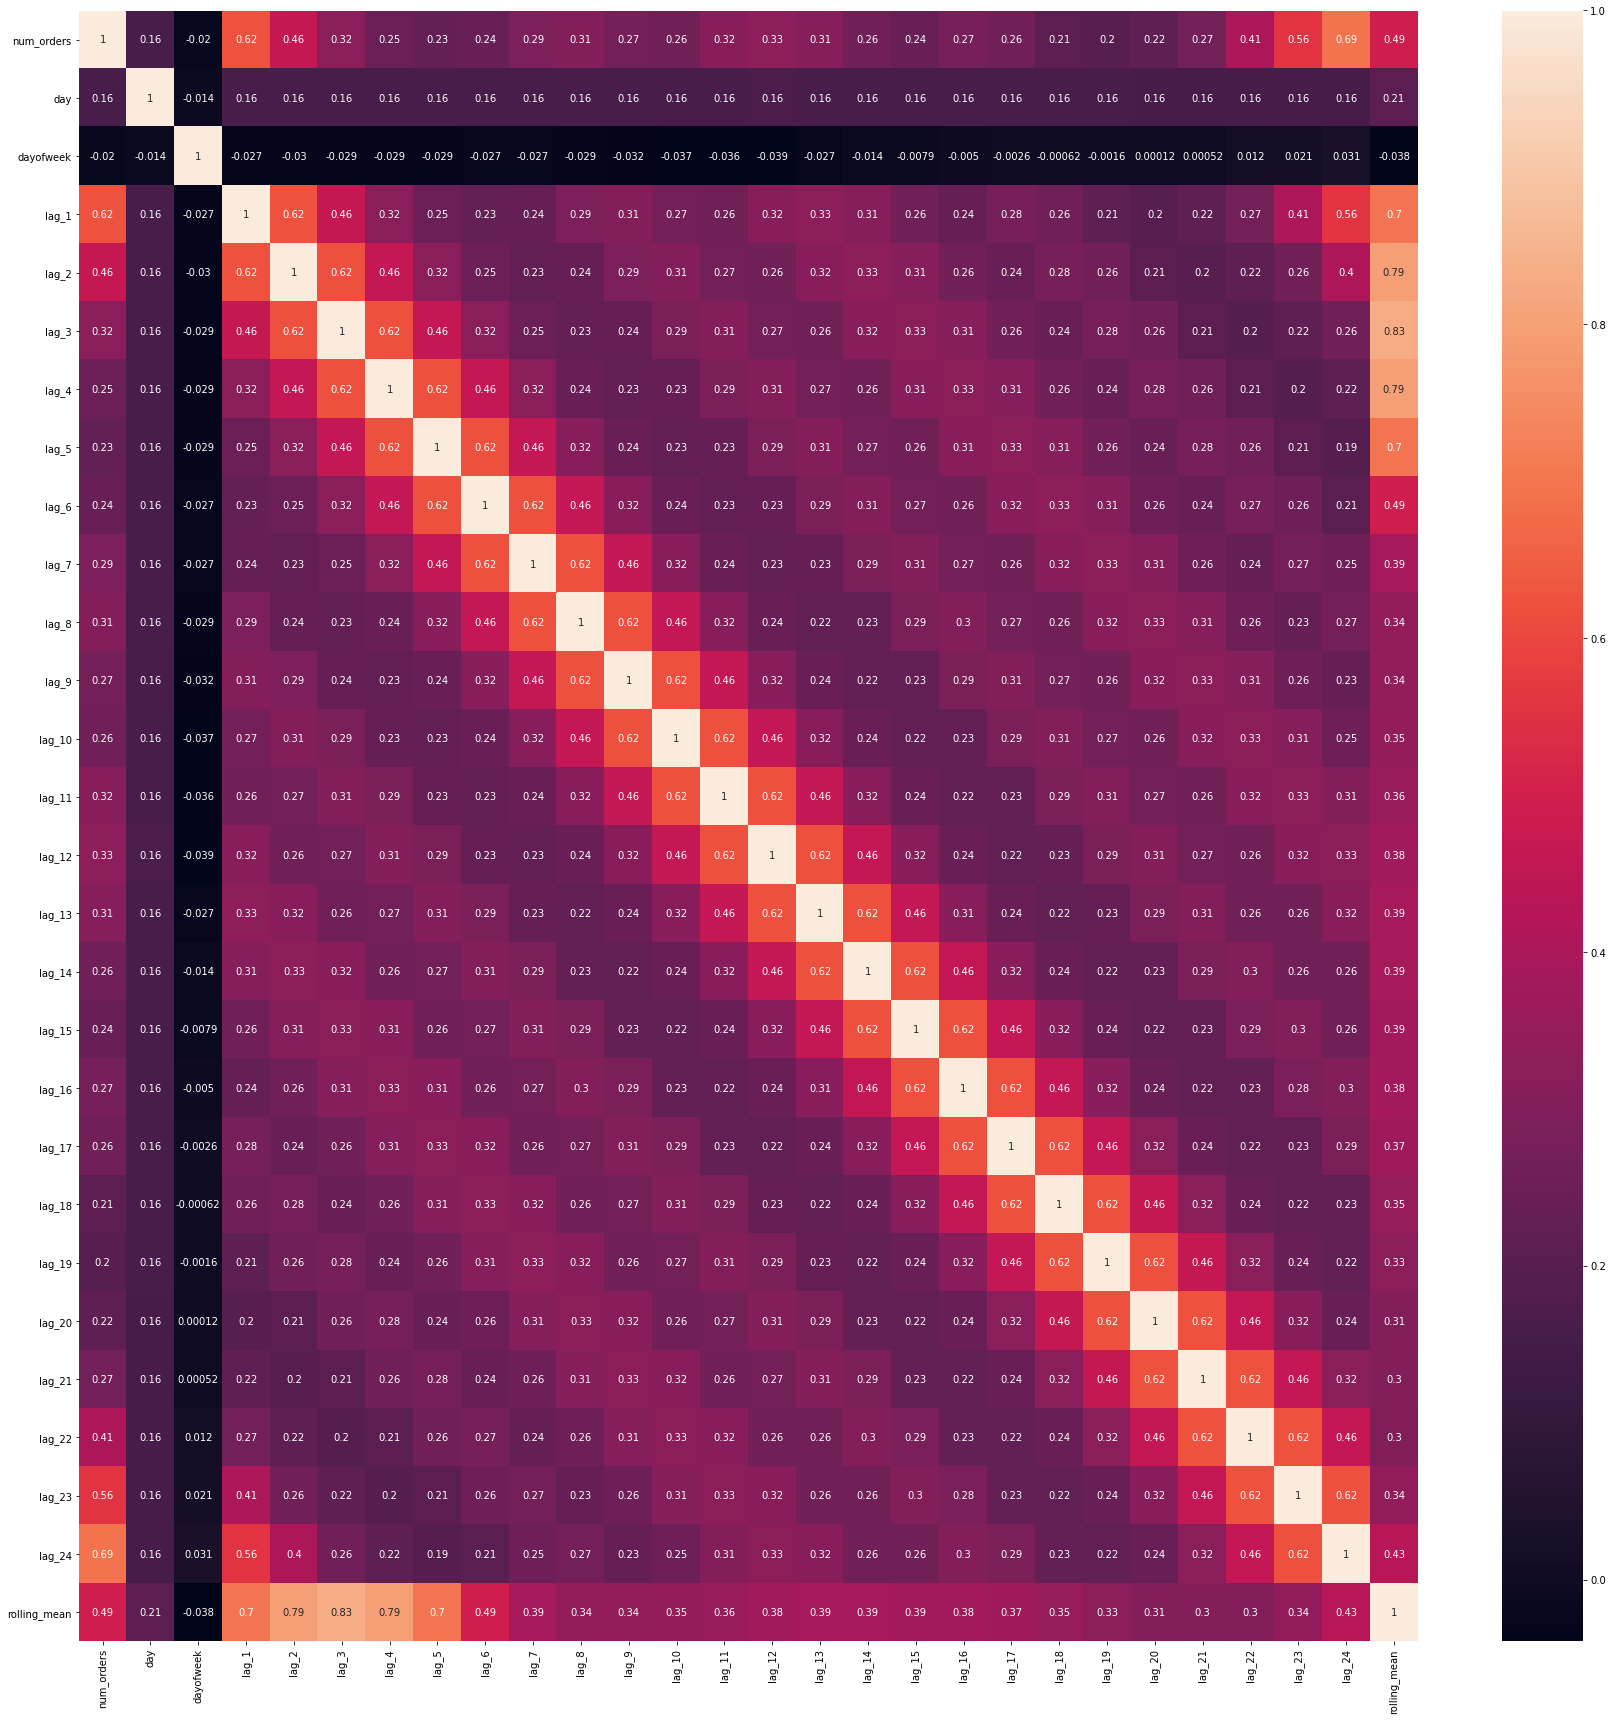

In [35]:
correlation_matrix = df.corr()#numeric_only=True
import seaborn as sns
plt.figure(figsize= (30, 30))
sns.heatmap(correlation_matrix, annot = True)


Матрица корреляций показывает связь целевого признака со столбцами сдвигов 1, 24, меньше 2, 23, 22. Это не кажется странным - втечение дня мы совершаем определённые действия, вытекающие одни из других.

Скользящее среднее сильно коррелирует с первыми пятью сдвигами. Выглядит это нормально - я задала окно в пять элементов. Мне кажется, с этим ничего не надо делать. Скользящее среднее показывает нам тренд, и это важно для предсказания. То есть, мы видим всю связь, которую сами настроили, и ничего не выбивается из этой картины.


#### Эксперимент с корреляцией

In [36]:

def get_VIF(dataFrame , target):
    X = add_constant(dataFrame.loc[:, dataFrame.columns != target])
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    return seriesObject

target = 'num_orders'
print(get_VIF(df,target))

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const           14.751629
day              1.081408
dayofweek        1.008213
lag_1                 inf
lag_2                 inf
lag_3                 inf
lag_4                 inf
lag_5                 inf
lag_6            2.350379
lag_7            2.343451
lag_8            2.350593
lag_9            2.360924
lag_10           2.349958
lag_11           2.354356
lag_12           2.361174
lag_13           2.358049
lag_14           2.348654
lag_15           2.339737
lag_16           2.351261
lag_17           2.347575
lag_18           2.340822
lag_19           2.346329
lag_20           2.362282
lag_21           2.364884
lag_22           2.365223
lag_23           2.348838
lag_24           2.219738
rolling_mean          inf
dtype: float64


Метод VIF сообщает, что параметры сдвигов и среднего сильно связаны друг с другом, поэтому я посчитаю метрики на разных сетах и оставлю тут тот, который сработает лучше. Мой план такой - оставить среднее, а количество фичей, на которых оно строится, удалить. Либо удалить на две фичи меньше - без первой и пятой, потому что у них корреляция не больше той, что я оставляю на целевом признаке.

Если я сделаю окно в шесть элементов, например, то посмотрим, что получится.

In [37]:
df.columns

Index(['num_orders', 'day', 'dayofweek', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18',
       'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24',
       'rolling_mean'],
      dtype='object')

In [38]:
df_6 = df.copy()
df_6 = df_6.drop(['day', 'dayofweek', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18',
       'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24',
       'rolling_mean'], axis=1)



In [39]:
make_features(df_6, 'num_orders', 24, 6)
df_6 = df_6.dropna()

In [40]:
df_6.head()

,num_orders,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-03 00:00:00,163,3,5,72.0,119.0,101.0,93.0,49.0,89.0,83.0,...,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,90.0,87.166667
2018-03-03 01:00:00,108,3,5,163.0,72.0,119.0,101.0,93.0,49.0,89.0,...,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,99.500000
2018-03-03 02:00:00,25,3,5,108.0,163.0,72.0,119.0,101.0,93.0,49.0,...,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,109.333333
2018-03-03 03:00:00,64,3,5,25.0,108.0,163.0,72.0,119.0,101.0,93.0,...,91.0,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,98.000000
2018-03-03 04:00:00,44,3,5,64.0,25.0,108.0,163.0,72.0,119.0,101.0,...,36.0,91.0,54.0,45.0,46.0,7.0,11.0,11.0,20.0,91.833333


<AxesSubplot:>

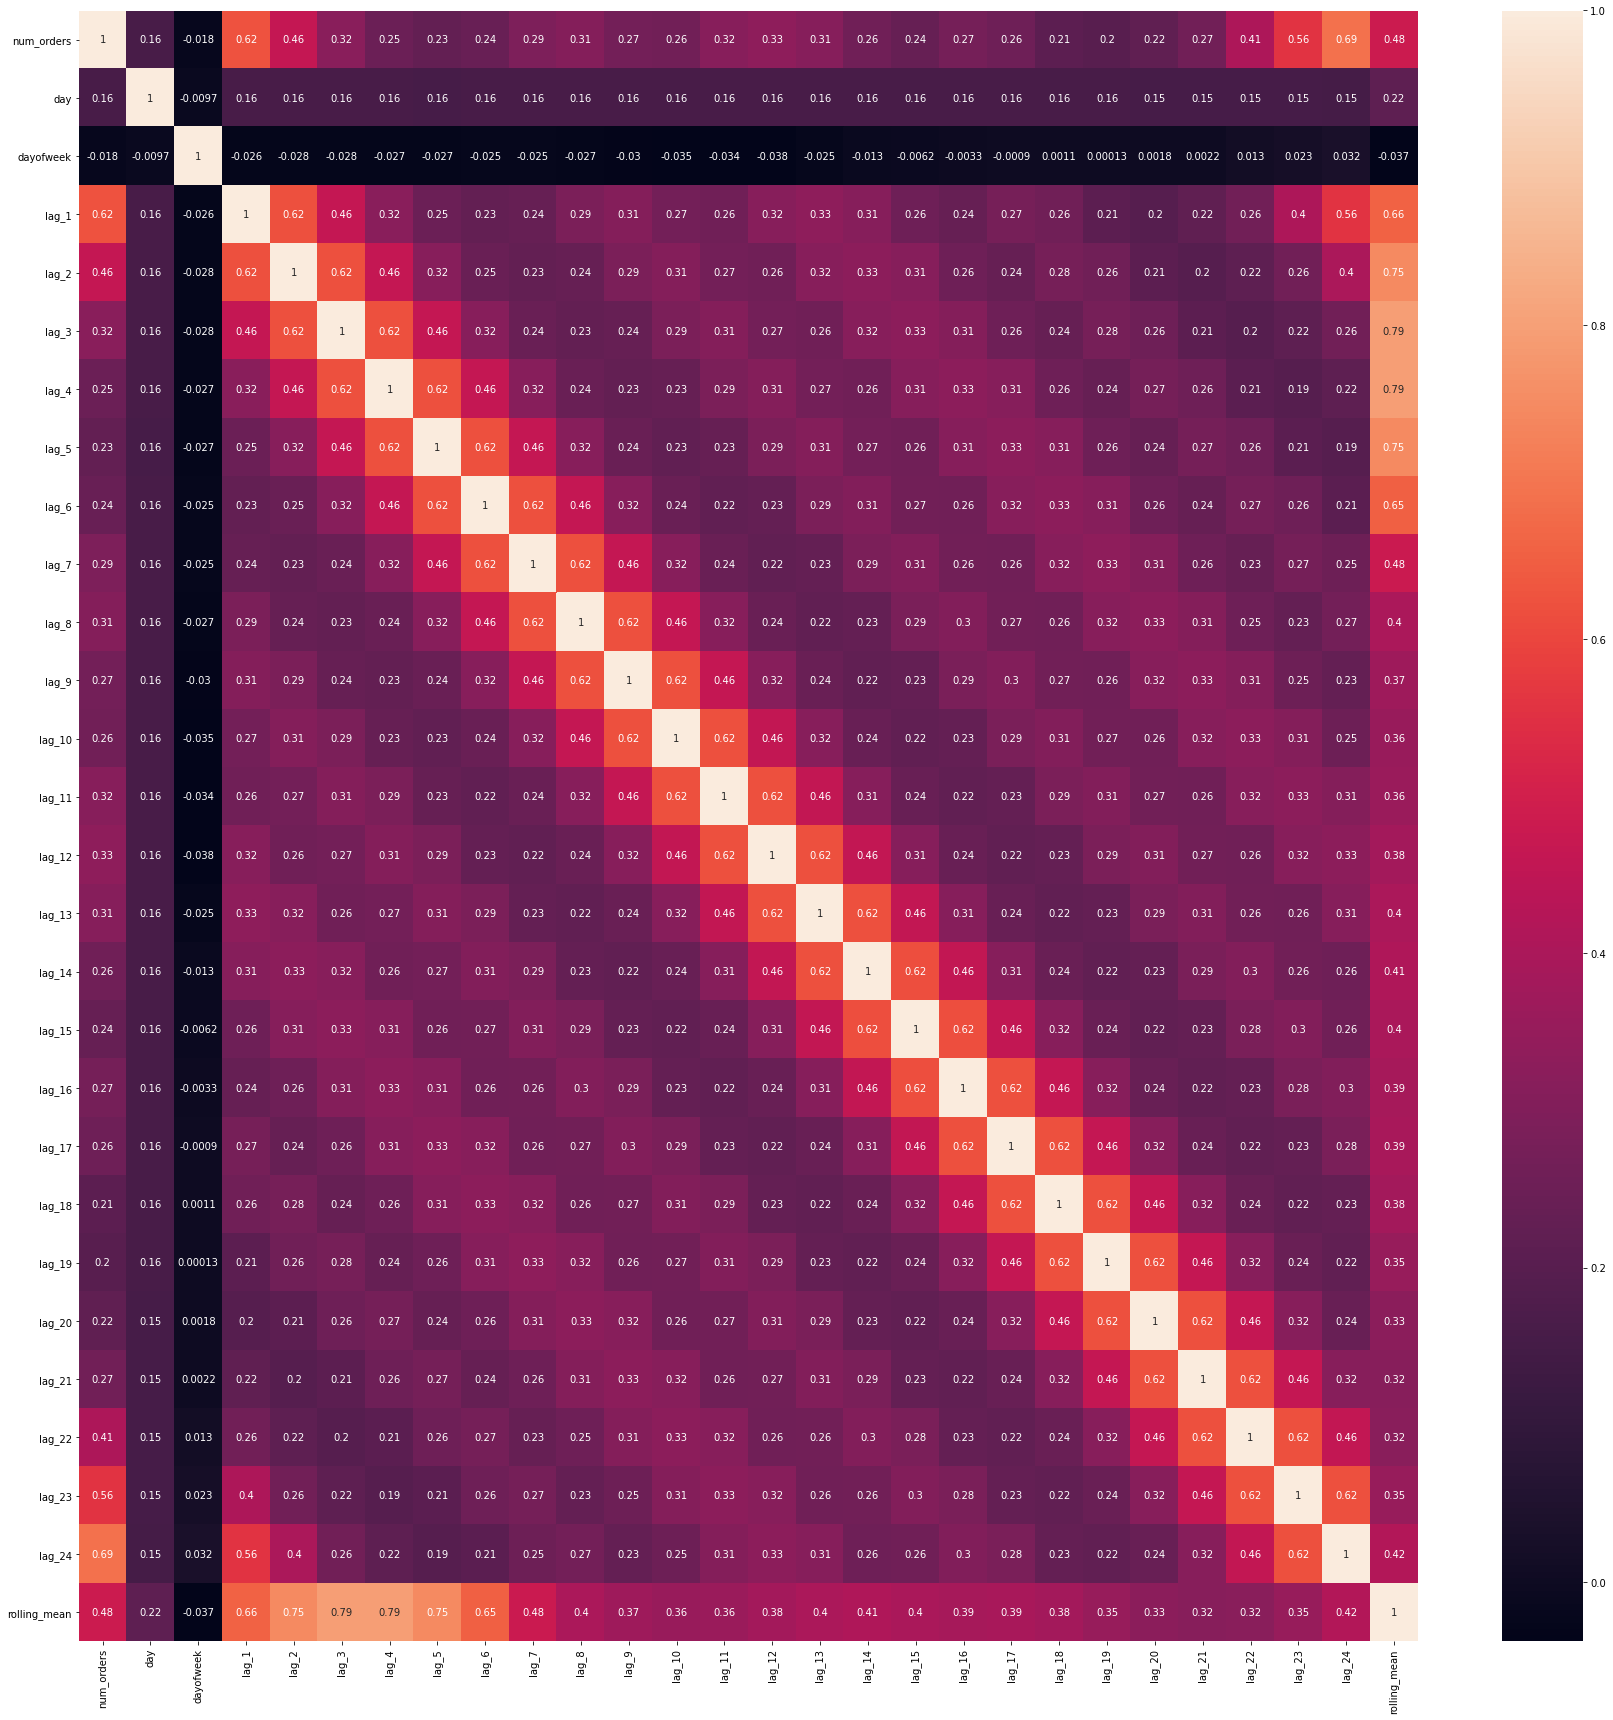

In [41]:

correlation_matrix = df_6.corr()

plt.figure(figsize= (30, 30))
sns.heatmap(correlation_matrix, annot = True)

Скользящее среднее теперь связано с шестью элементами.




In [42]:
print(get_VIF(df_6,target))

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const           14.803275
day              1.077357
dayofweek        1.008107
lag_1                 inf
lag_2                 inf
lag_3                 inf
lag_4                 inf
lag_5                 inf
lag_6                 inf
lag_7            2.340374
lag_8            2.346823
lag_9            2.358018
lag_10           2.346596
lag_11           2.351069
lag_12           2.358176
lag_13           2.354419
lag_14           2.345554
lag_15           2.336654
lag_16           2.348198
lag_17           2.344661
lag_18           2.338345
lag_19           2.343735
lag_20           2.359933
lag_21           2.362566
lag_22           2.363013
lag_23           2.345476
lag_24           2.217747
rolling_mean          inf
dtype: float64


### Деление на обучающую и тестовую выборки

Величина тестовой выборки задана в 10 %.

In [44]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)
y_train = train['num_orders']
y_test = test['num_orders']
X_train = train.drop(['num_orders'], axis=1)
X_test = test.drop(['num_orders'], axis=1)

In [45]:
print('Размерности получившихся выборок:')
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test:  {X_test.shape},  y_test:  {y_test.shape}')
 

Размерности получившихся выборок:
X_train: (3952, 27), y_train: (3952,)
X_test:  (440, 27),  y_test:  (440,)


In [46]:
df.describe()

,num_orders,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,...,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,84.573543,15.918033,3.005464,84.540073,84.515027,84.493852,84.472678,84.451958,84.421448,84.382058,...,84.152322,84.145264,84.140027,84.123634,84.072404,84.064891,84.028689,84.003871,83.969262,84.494718
std,45.050123,8.811011,1.996117,45.015225,44.968748,44.955561,44.944716,44.941932,44.904187,44.863722,...,44.723919,44.732387,44.739487,44.754926,44.673101,44.673365,44.619468,44.588590,44.498432,34.284826
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,54.000000,8.000000,1.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,61.800000
50%,78.000000,16.000000,3.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.800000
75%,108.000000,24.000000,5.000000,108.000000,108.000000,107.250000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,102.650000
max,462.000000,31.000000,6.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,...,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,286.200000


Разброс значений в числовых признаках большой, также нужно обозначить категориальные признаки, поэтому приступаем к трансформации данных.

### Трансформеры

Деревянные модели нуждаются в интерпретации категориальных признаков, а бустинги сами их обрабатывают. Пэтому создадим два сета с разным набором трансформаций - в одном закодируем все признаки, в другом - только числовые.

In [47]:
# В этих категориальные признаки останутся некодированными.

X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

**Числовые признаки шкалируем.**

In [48]:
df.columns

Index(['num_orders', 'day', 'dayofweek', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18',
       'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24',
       'rolling_mean'],
      dtype='object')

In [49]:
columns_numeric = [ 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18',
       'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'rolling_mean']#'lag_1', 'lag_2', 'lag_3', 'lag_4','lag_5',
columns_cat = ['day', 'dayofweek']

In [50]:

scaler = StandardScaler().fit(X_train[columns_numeric])
                             
X_train[columns_numeric] = scaler.transform(X_train[columns_numeric])
X_test[columns_numeric] = scaler.transform(X_test[columns_numeric])

X_train_cat[columns_numeric] = scaler.transform(X_train[columns_numeric])
X_test_cat[columns_numeric] = scaler.transform(X_test[columns_numeric])

**Категориальные тоже закодируем.**

In [51]:
encoder = OrdinalEncoder() 
encoder.fit(X_train[columns_cat])

X_train[columns_cat] = encoder.transform(X_train[columns_cat])
X_test[columns_cat] = encoder.transform(X_test[columns_cat])

### Создание таблицы для сбора результатов обучения

In [52]:
rating_table = pd.DataFrame(columns=['RMSE'])
rating_table

,RMSE


In [53]:
def add_line_df_score(df_score, model, RMSE):
    
    df_score.loc[model, 'RMSE'] = "{:.3}".format(RMSE)
    
    return df_score

### Обучение моделей

#### LinearRegression

In [54]:
parameters = {'fit_intercept':[True, False], 'copy_X':[True, False] }
ts_cv = TimeSeriesSplit(n_splits = 5)
grid_lr = GridSearchCV(LinearRegression(),
                       parameters, scoring="neg_root_mean_squared_error", cv = ts_cv,
                       n_jobs= -1, return_train_score=True)
grid_lr.fit(X_train, y_train)

print('Best params:', grid_lr.best_params_)
print('Best score:', grid_lr.best_score_)


Best params: {'copy_X': True, 'fit_intercept': True}
Best score: -27.208333175276625


In [55]:
add_line_df_score(rating_table, 'LinearRegression', grid_lr.best_score_*(-1))
rating_table

,RMSE
LinearRegression,27.2


#### DecisionTreeRegressor

In [ ]:
parameters = {'max_depth' : [0, 1600, 3], 'min_samples_split' : [1, 2000, 3], 'min_samples_leaf' : [0, 8000, 3]}
ts_cv = TimeSeriesSplit(n_splits = 5)
grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=RANDOM_STATE),
                         parameters, scoring="neg_root_mean_squared_error", cv = ts_cv,
                         n_jobs= -1, return_train_score=True)
grid_tree.fit(X_train, y_train)

print('Best params:', grid_tree.best_params_)
print('Best score:', grid_tree.best_score_)



In [57]:
add_line_df_score(rating_table, 'DecisionTreeRegressor', grid_tree.best_score_*(-1))
rating_table

,RMSE
LinearRegression,27.2
DecisionTreeRegressor,30.5


#### RandomForestRegressor

In [58]:
parameters_forest = {'n_estimators': [1, 200], 'max_depth' : [1, 300]}
ts_cv = TimeSeriesSplit(n_splits = 5)
grid_forest = GridSearchCV(RandomForestRegressor(random_state=RANDOM_STATE),
                        parameters_forest, scoring="neg_root_mean_squared_error", cv=ts_cv,
                           n_jobs=-1, return_train_score=True)
grid_forest.fit(X_train, y_train)

print('Best params:', grid_forest.best_params_)
print('Best score:', grid_forest.best_score_)


Best params: {'max_depth': 300, 'n_estimators': 200}
Best score: -25.572942250387605


In [59]:
add_line_df_score(rating_table, 'RandomForestRegressor', grid_forest.best_score_*(-1))
rating_table

,RMSE
LinearRegression,27.2
DecisionTreeRegressor,30.5
RandomForestRegressor,25.6


#### LGBMRegressor

##### Сам обрабатывает категориальные признаки

In [ ]:
parameters_lgbm = {
    'max_depth': range(4,10),
    'n_estimators': range(1,100,3)
}
lgbm = LGBMRegressor(seed=RANDOM_STATE, verbose = -1)
ts_cv = TimeSeriesSplit(n_splits = 5)
grid_lgbm = GridSearchCV(lgbm, parameters_lgbm, cv=ts_cv, scoring='neg_root_mean_squared_error',
                         return_train_score=True)
grid_lgbm.fit(X_train_cat, y_train, categorical_feature=columns_cat)
#grid_lgbm.best_params_

print('Best params:', grid_lgbm.best_params_)
print('Best score:', grid_lgbm.best_score_)


In [61]:
add_line_df_score(rating_table, 'LGBMRegressor', grid_lgbm.best_score_*(-1))
rating_table

,RMSE
LinearRegression,27.2
DecisionTreeRegressor,30.5
RandomForestRegressor,25.6
LGBMRegressor,26.1


##### Получает полностью кодированные данные

In [74]:
parameters_lgbm = {
    'max_depth': range(4,10),
    'n_estimators': range(1,100,3)
}
lgbm = LGBMRegressor(seed=RANDOM_STATE, verbose = -1)
ts_cv = TimeSeriesSplit(n_splits = 5)
grid_lgbm = GridSearchCV(lgbm, parameters_lgbm, cv=ts_cv, scoring='neg_root_mean_squared_error',
                         return_train_score=True)
grid_lgbm.fit(X_train, y_train)
#grid_lgbm.best_params_

print('Best params:', grid_lgbm.best_params_)
print('Best score:', grid_lgbm.best_score_)


Best params: {'max_depth': 5, 'n_estimators': 94}
Best score: -25.465359006412996


In [75]:
add_line_df_score(rating_table, 'LGBMRegressor data transformed', grid_lgbm.best_score_*(-1))
rating_table

,RMSE
LinearRegression,27.2
DecisionTreeRegressor,30.5
RandomForestRegressor,25.6
LGBMRegressor,26.1
CatBoostRegressor,27.5
LGBMRegressor data transformed,25.5


#### CatBoostRegressor

##### Сам обрабатывает категориальные признаки

In [ ]:
parameters_cat = {'n_estimators': [1, 200], 'max_depth' : [1, 300], 'l2_leaf_reg': [1, 50]}

grid_cat = GridSearchCV(CatBoostRegressor(random_state=RANDOM_STATE),
                        parameters_cat, scoring="neg_root_mean_squared_error",
                        cv=5, n_jobs=-1, return_train_score=True)

grid_cat.fit(X_train_cat, y_train, silent=True, cat_features=columns_cat)
print('Best params:', grid_cat.best_params_)
print('Best score:', grid_cat.best_score_)


In [63]:
add_line_df_score(rating_table, 'CatBoostRegressor', grid_cat.best_score_*(-1))
rating_table

,RMSE
LinearRegression,27.2
DecisionTreeRegressor,30.5
RandomForestRegressor,25.6
LGBMRegressor,26.1
CatBoostRegressor,27.5


##### Получает полностью кодированные данные

In [ ]:
parameters_cat = {'n_estimators': [1, 200], 'max_depth' : [1, 300], 'l2_leaf_reg': [1, 50]}

grid_cat = GridSearchCV(CatBoostRegressor(random_state=RANDOM_STATE),
                        parameters_cat, scoring="neg_root_mean_squared_error",
                        cv=5, n_jobs=-1, return_train_score=True)

grid_cat.fit(X_train, y_train, silent=True)
print('Best params:', grid_cat.best_params_)
print('Best score:', grid_cat.best_score_)


In [77]:
add_line_df_score(rating_table, 'CatBoostRegressor data transformed', grid_cat.best_score_*(-1))
rating_table

,RMSE
LinearRegression,27.2
DecisionTreeRegressor,30.5
RandomForestRegressor,25.6
LGBMRegressor,26.1
CatBoostRegressor,27.5
LGBMRegressor data transformed,25.5
CatBoostRegressor data transformed,27.5


In [78]:
rating_table.sort_values('RMSE', ascending=True).style.highlight_min(subset=['RMSE'])

,RMSE
LGBMRegressor data transformed,25.5
RandomForestRegressor,25.6
LGBMRegressor,26.1
LinearRegression,27.2
CatBoostRegressor,27.5
CatBoostRegressor data transformed,27.5
DecisionTreeRegressor,30.5


Минимальная ошибка у модели LGBMRegressor на полностью кодированных данных.

## Тестирование

На модели LightGBM с подобранными параметрами 'max_depth'= 9 и 'n_estimators'= 79 сделаем предсказание на полностью кодированных тестовых данных.

In [80]:
best_model = grid_lgbm.best_estimator_
predict_best = best_model.predict(X_test)
print("RMSE тестовой выборки:", round(mean_squared_error(predict_best,y_test, squared=False), 2))

RMSE тестовой выборки: 41.13


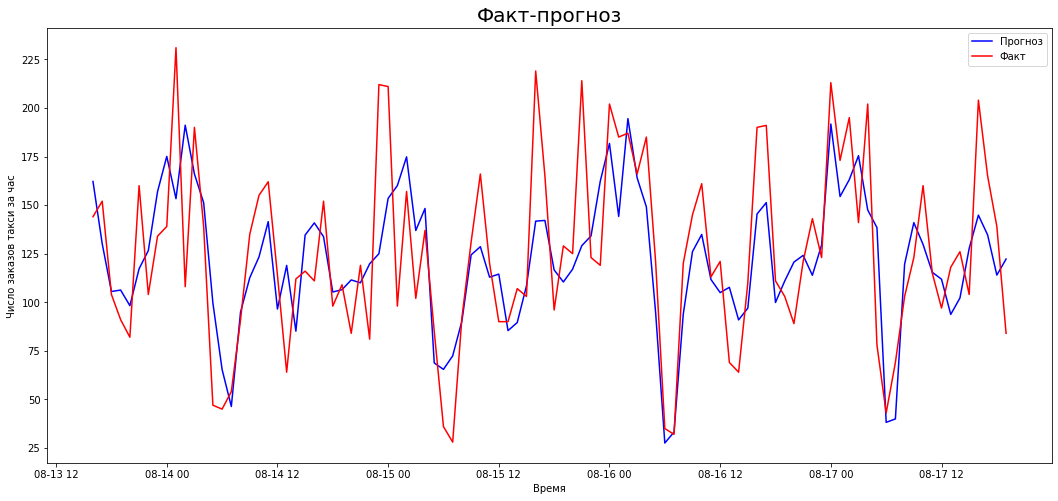

In [81]:
#lgbm transformed
y1 = predict_best[:100]
y2 = y_test[:100]
x = y_test[:100].index

fig,ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(8)

plt.plot(x,y1,'b',label='Прогноз')
plt.plot(x,y2,'r',label='Факт')
ax.legend()
ax.set_title('Факт-прогноз', fontsize=20)
ax.set_xlabel('Время')
ax.set_ylabel('Число заказов такси за час')
plt.show()

Мы получили модель, которая имеет ошибку меньше заданной (48).
Заказчик может воспользоваться ею в своих целях - модель предсказывает количество заказов такси на следующий час.
